In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pyIEEM.data.utils import to_pd_interval

In [8]:
data = pd.read_csv('FormatData_ComesF.csv', index_col = [0,1,2,3,4,5], converters={'age_x': to_pd_interval, 'age_y': to_pd_interval})
age_group_x = data.index.get_level_values('age_x').unique()
age_group_y = data.index.get_level_values('age_y').unique()

In [13]:
data

number_contacts  \
location             duration  type_day   vacation age_x     age_y                        
home                 < 5 min   weekday    True     [0, 12)   [0, 12)                 10   
                                                             [12, 18)                10   
                                                             [18, 25)                 3   
                                                             [25, 35)                16   
                                                             [35, 45)                21   
...                                                                                 ...   
work_leisure_outdoor > 240 min weekendday False    [75, 120) [35, 45)                 0   
                                                             [45, 55)                 0   
                                                             [55, 65)                 0   
                                                             [65, 75)                 0   
                                                             [75, 120)                0   

                                                                        number_survey_participants  
location             duration  type_day   vacation age_x     age_y                                  
home                 < 5 min   weekday    True     [0, 12)   [0, 12)                             7  
                                                             [12, 18)                            5  
                                                             [18, 25)                            3  
                                                             [25, 35)                           10  
                                                             [35, 45)                           14  
...                                                                                            ...  
work_leisure_outdoor > 240 min weekendday False    [75, 120) [35, 45)                            0  
                                                             [45, 55)                            0  
                                                             [55, 65)                            0  
                                                             [65, 75)                            0  
                                                             [75, 120)                           0  

[11340 rows x 2 columns]

## Visualize the raw data

In [104]:
place = 'home'
duration = '60-240 min'
daytype = 'weekday'

In [105]:
estimate = data.loc[(place, duration, daytype, False, slice(None), slice(None)), 'number_contacts']/data.loc[(place, duration, daytype, False, slice(None), slice(None)), 'number_survey_participants']
estimate = estimate.fillna(0)
matrix = estimate.values.reshape([len(age_group_x), len(age_group_y)])

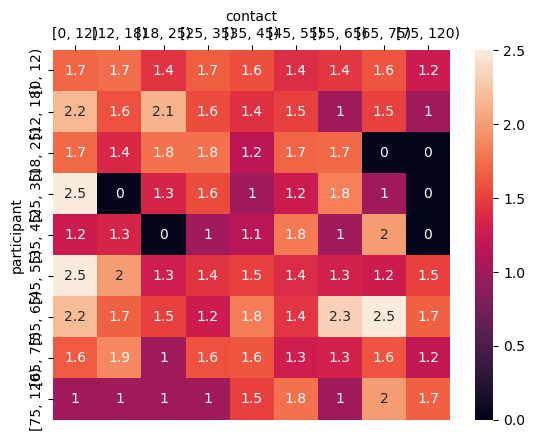

In [106]:
fig,ax=plt.subplots()
ax = sns.heatmap(matrix, annot=True)
ax.xaxis.tick_top() # x axis on top
ax.xaxis.set_label_position('top')
ax.set(xticklabels=list(age_group_x.values.astype(str)), yticklabels=list(age_group_y.values.astype(str)))
ax.set(xlabel='contact', ylabel='participant')
plt.show()
plt.close()